# Disease Prediction using Machine Learning

In this data-driven journey, I will venture into the realm of disease prediction using machine learning, guided by our expert data scientist. Our dataset contains vital information regarding the diagnosis of heart disease patients. Through the power of machine learning, we aim to predict whether an individual is susceptible to heart disease, leveraging features such as chest pain type, age, sex, and more.

Heart disease stands as a prominent cause of morbidity and mortality on a global scale. Predicting cardiovascular disease is a crucial area within clinical data analysis, considering its profound impact on public health. The healthcare industry harbors a vast reservoir of data, and the process of data mining transforms this extensive healthcare repository into actionable insights, facilitating informed decision-making and predictions.

My journey unfolds by training machine learning models capable of discerning the presence or absence of heart disease based on a comprehensive set of attributes. To achieve this, we draw upon the Cleveland Heart Disease dataset, sourced from the UCI repository. As we traverse this path, each line of code and model developed brings us closer to unraveling the secrets of disease prediction.

My ultimate goal is to empower healthcare professionals and individuals with data-driven insights, enhancing their ability to make early and accurate predictions regarding heart disease. Through the utilization of machine learning, we aim to contribute to the vital task of improving public health and the well-being of individuals across the world.

## Importing Health Data

In [1]:
import pandas as pd

df = pd.read_csv('heart_cleveland_upload.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


In [2]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [3]:
df.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
287,42,0,3,102,265,0,2,122,0,0.6,1,0,0,0
288,42,1,3,136,315,0,0,125,1,1.8,1,0,1,1
289,42,1,3,140,226,0,0,178,0,0.0,0,0,0,0
290,41,1,3,110,172,0,2,158,0,0.0,0,0,2,1
291,40,1,3,110,167,0,2,114,1,2.0,1,0,2,1
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


## Identifying Null Values

In [6]:
sumofnull = df.isnull().sum()
sumofnull

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

## Examining Data Types

In [7]:
datatype = df.dtypes

In [8]:
datatype

age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object

## Identifying Numerical and Categorical Features

In [9]:
def get_features_lists():
    numeric_features = ['age','trestbps','chol','thalach','oldpeak','condition']
    cat_features = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
    
    return numeric_features, cat_features
numeric_features, cat_features = get_features_lists()

In [10]:
get_features_lists()

(['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition'],
 ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

## Converting Features to Categorical Data Types

In [11]:
lst = ['sex','cp','fbs','restecg','exang','slope','ca','thal']
df[lst] = df[lst].astype(object)
output = df.dtypes
print(output)

age            int64
sex           object
cp            object
trestbps       int64
chol           int64
fbs           object
restecg       object
thalach        int64
exang         object
oldpeak      float64
slope         object
ca            object
thal          object
condition      int64
dtype: object


## Exploring Feature Correlation

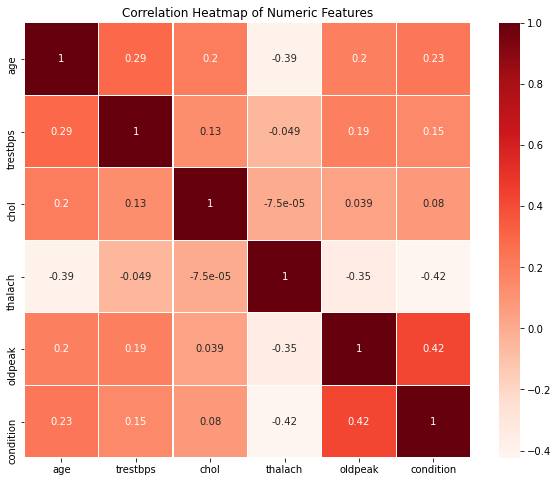

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_features = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak', 'condition']

# Select relevant columns for correlation analysis
numeric_df = df[numeric_features]

# Calculate correlation
corr_data = numeric_df.corr()

# Create heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_data, annot=True, cmap='Reds', linewidths=0.1)
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

## Visualizing Health Conditions

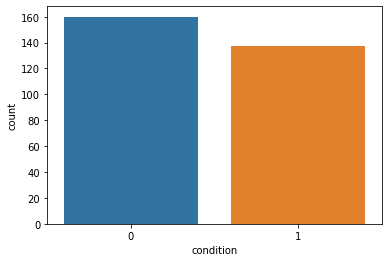

In [13]:
condition_ax = sns.countplot(x=df['condition'])
plt.show()

## Analysing Health Conditions by Gender

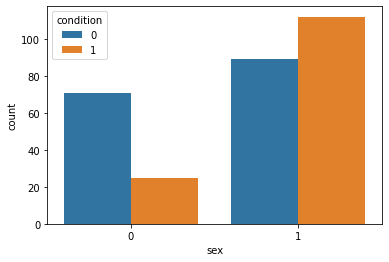

In [14]:
sex_ax = sns.countplot(x=df['sex'],hue=df['condition'])
plt.show()

## Examining Chest Pain Types and Health Conditions

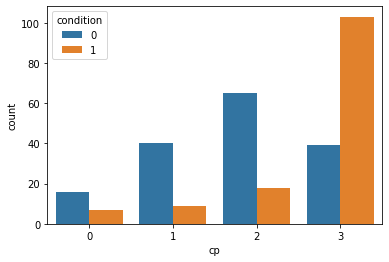

In [15]:
cp_ax = sns.countplot(x=df['cp'],hue=df['condition'])
plt.show()

## Investigating Fasting Blood Sugar Levels and Health Conditions

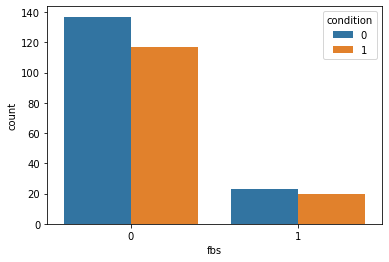

In [16]:
fbs_ax = sns.countplot(x=df['fbs'],hue=df['condition'])
plt.show()

## Analysing Resting Electrocardiographic Results and Health Conditions

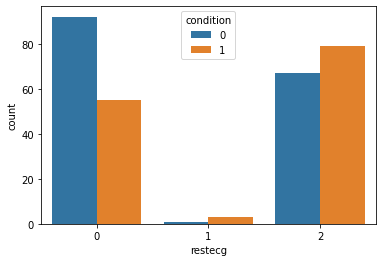

In [17]:
restecg_ax = sns.countplot(x=df['restecg'],hue=df['condition'])
plt.show()

## Examining Exercise-Induced Angina and Health Conditions

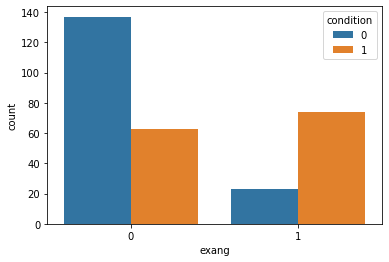

In [18]:
exang_ax = sns.countplot(x=df['exang'],hue=df['condition'])
plt.show()

## Investigating the Slope of the ST Segment and Health Conditions

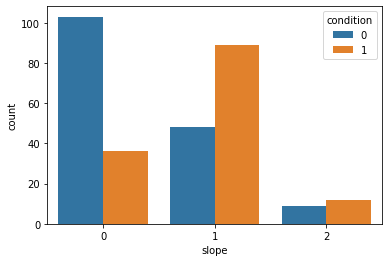

In [19]:
slope_ax = sns.countplot(x=df['slope'],hue=df['condition'])
plt.show()

## Analysing the number of Major Vessels Colored by Fluoroscopy an Health Conditions

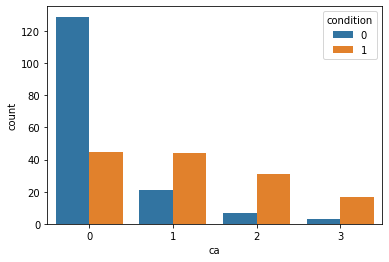

In [20]:
ca_ax = sns.countplot(x=df['ca'],hue=df['condition'])
plt.show()

## Examining Thalassemia and Health Conditions

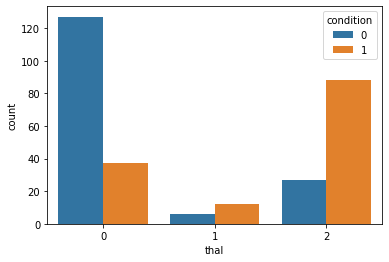

In [21]:
thal_ax = sns.countplot(x=df['thal'],hue=df['condition'])
plt.show()

## Visualing Age Distribution

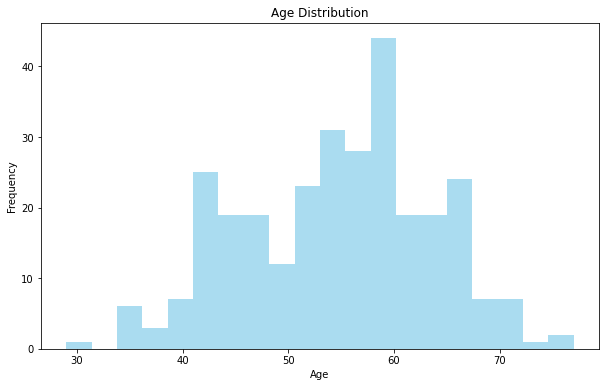

In [22]:
age_col = df['age']
plt.figure(figsize=(10, 6))
plt.hist(age_col, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

## Visualising Resting Blood Pressure Distribution

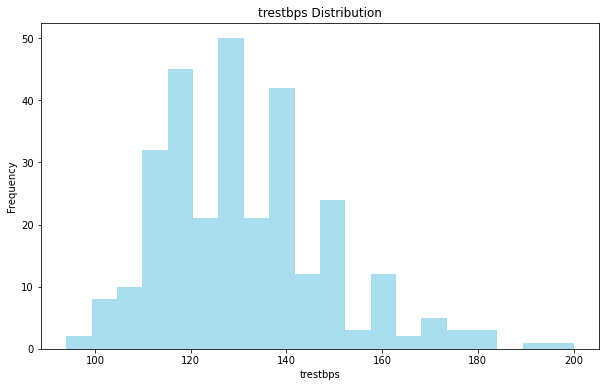

In [23]:
trestbps_col = df['trestbps']
plt.figure(figsize=(10, 6))
plt.hist(trestbps_col, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('trestbps')
plt.ylabel('Frequency')
plt.title('trestbps Distribution')
plt.show()

## Visualizing Cholistrol  Distribution

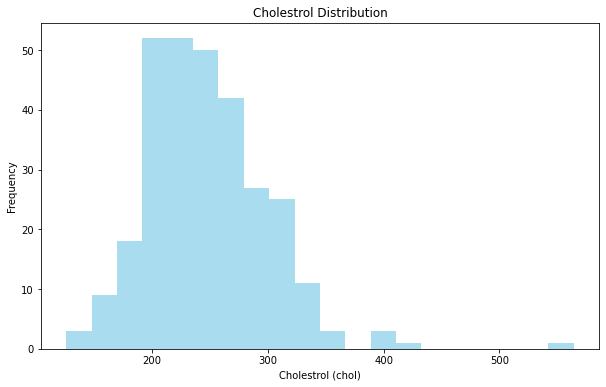

In [24]:
chol_col = df['chol']
plt.figure(figsize=(10, 6))
plt.hist(chol_col, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Cholestrol (chol)')
plt.ylabel('Frequency')
plt.title('Cholestrol Distribution')
plt.show()

## Visualizing Maximum Heart Rate Distribution

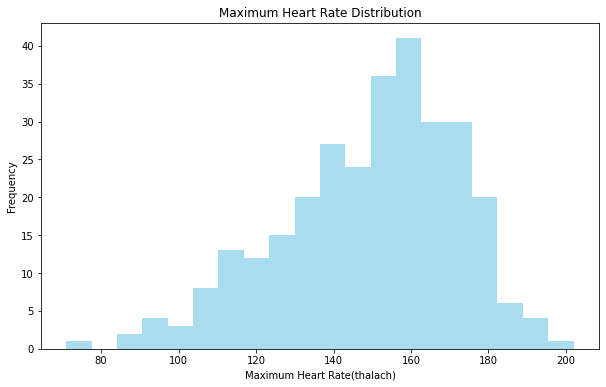

In [25]:
thalach_col = df['thalach']
plt.figure(figsize=(10, 6))
plt.hist(thalach_col, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('Maximum Heart Rate(thalach)')
plt.ylabel('Frequency')
plt.title('Maximum Heart Rate Distribution')
plt.show()

## Visualizing ST Depression Distribution

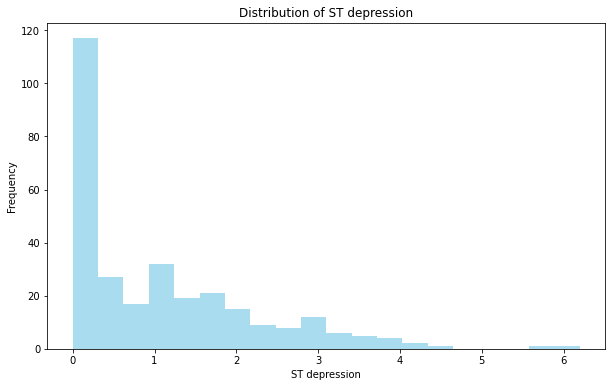

In [26]:
oldpeak_col = df['oldpeak']
plt.figure(figsize=(10, 6))
plt.hist(oldpeak_col, bins=20, color='skyblue', alpha=0.7)
plt.xlabel('ST depression')
plt.ylabel('Frequency')
plt.title('Distribution of ST depression')
plt.show()

## Visualizing Chest Pain Types, Age, and Health Conditions

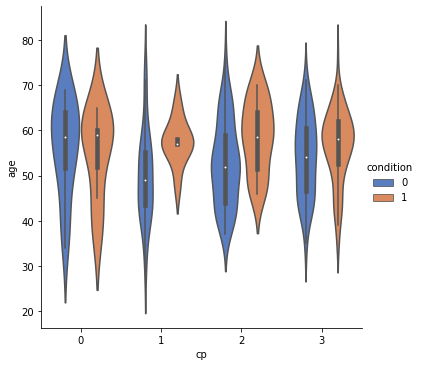

In [27]:
violinplt = sns.catplot(x='cp',y='age',hue='condition',data=df,kind='violin',palette='muted')

## Analyzing Fasting Blood Sugar Levels and Health Conditions

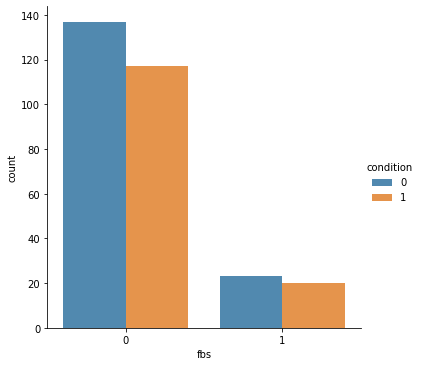

In [28]:
countplt = sns.catplot(x='fbs',hue='condition',data=df,kind='count',alpha=0.85)

## Encoding Categorical Features

In [29]:
# Define the list of categorical columns
categorical_cols = ['cp', 'thal', 'slope']

# Iterate through the categorical columns and cast each to integer datatype
for col in categorical_cols:
    df[col] = df[col].astype(int)

# Perform one-hot encoding on the specified categorical columns
df_encoded = pd.get_dummies(df, columns=categorical_cols, prefix_sep='_')

# Display the resulting DataFrame
print(df_encoded)

     age sex  trestbps  chol fbs restecg  thalach exang  oldpeak ca  ...  \
0     69   1       160   234   1       2      131     0      0.1  1  ...   
1     69   0       140   239   0       0      151     0      1.8  2  ...   
2     66   0       150   226   0       0      114     0      2.6  0  ...   
3     65   1       138   282   1       2      174     0      1.4  1  ...   
4     64   1       110   211   0       2      144     1      1.8  0  ...   
..   ...  ..       ...   ...  ..     ...      ...   ...      ... ..  ...   
292   40   1       152   223   0       0      181     0      0.0  0  ...   
293   39   1       118   219   0       0      140     0      1.2  0  ...   
294   35   1       120   198   0       0      130     1      1.6  0  ...   
295   35   0       138   183   0       0      182     0      1.4  0  ...   
296   35   1       126   282   0       2      156     1      0.0  0  ...   

     cp_0  cp_1  cp_2  cp_3  thal_0  thal_1  thal_2  slope_0  slope_1  slope_2  
0     

## Preparing Features and Target Variables

In [30]:
x = df.drop('condition', axis=1)

y = df['condition']

In [31]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0


In [32]:
y

0      0
1      0
2      0
3      1
4      0
      ..
292    1
293    1
294    1
295    0
296    1
Name: condition, Length: 297, dtype: int64

## Scaling Features

In [33]:
from sklearn.preprocessing import MinMaxScaler
# Initialize MinMaxScaler
scaler = MinMaxScaler()
# Apply MinMaxScaler to scale the 'x' DataFrame
x_scaled = scaler.fit_transform(x)

In [34]:
x_scaled

array([[0.83333333, 1.        , 0.        , ..., 0.5       , 0.33333333,
        0.        ],
       [0.83333333, 0.        , 0.        , ..., 0.        , 0.66666667,
        0.        ],
       [0.77083333, 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.125     , 1.        , 1.        , ..., 0.5       , 0.        ,
        1.        ],
       [0.125     , 0.        , 1.        , ..., 0.        , 0.        ,
        0.        ],
       [0.125     , 1.        , 1.        , ..., 0.        , 0.        ,
        1.        ]])

## Splitting the Data into Training and Testing Sets

In [35]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x_scaled, y, train_size=0.8, test_size=0.2, random_state=4)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(237, 13)
(60, 13)
(237,)
(60,)


## Building and Evaluating Logistic Regression Model

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

# Create a logistic regression model
lr_model = LogisticRegression()

# Fit the model to the training data
lr_model.fit(x_train, y_train)

# Perform cross-validation with 10 folds
lr_cv_results = cross_val_score(lr_model, x_train, y_train, cv=10)

# Calculate the mean score from cross-validation
lr_mean_score = lr_cv_results.mean()

print("Mean score from cross-validation:", lr_mean_score)

Mean score from cross-validation: 0.834963768115942


## Building and Evaluating Linear Discriminant Analysis Model

In [38]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score

# Create an LDA model
ldr_model = LinearDiscriminantAnalysis()

# Fit the model to the training data
ldr_model.fit(x_train, y_train)

# Perform cross-validation with 10 folds
ldr_cv_results = cross_val_score(ldr_model, x_train, y_train, cv=10)

# Calculate the mean score from cross-validation and round it to four decimal places
ldr_mean_score = round(ldr_cv_results.mean(), 4)

print("Mean accuracy from cross-validation:", ldr_mean_score)

Mean accuracy from cross-validation: 0.835


## Building and Evaluating K-Nearest Neighbors (KNN) Model

In [40]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score

# Create a KNN model
knn_model = KNeighborsClassifier()

# Fit the model to the training data
knn_model.fit(x_train, y_train)

# Perform cross-validation with 10 folds
knn_cv_results = cross_val_score(knn_model, x_train, y_train, cv=10)

# Calculate the mean score from cross-validation and round it to four decimal places
knn_mean_score = round(knn_cv_results.mean(), 4)

# Calculate the standard deviation of the scores
knn_std_score = round(knn_cv_results.std(), 4)

print("Mean accuracy from cross-validation:", knn_mean_score)
print("Standard deviation of scores:", knn_std_score)


Mean accuracy from cross-validation: 0.7973
Standard deviation of scores: 0.0854


## Building and Evaluating Decision Tree Classifier Model

In [41]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Create a decision tree classifier model
dt_model = DecisionTreeClassifier()

# Fit the model to the training data
dt_model.fit(x_train, y_train)

# Perform cross-validation with 10 folds
dt_cv_results = cross_val_score(dt_model, x_train, y_train, cv=10)

# Calculate the mean score from cross-validation and round it to four decimal places
dt_mean_score = round(dt_cv_results.mean(), 4)

print("Mean accuracy from cross-validation:", dt_mean_score)

Mean accuracy from cross-validation: 0.7049


## Building and Evaluating Gaussian Naive Bayes Model

In [42]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

# Create a Gaussian Naive Bayes model
gnb_model = GaussianNB()

# Fit the model to the training data
gnb_model.fit(x_train, y_train)

# Perform cross-validation with 10 folds
gnb_cv_results = cross_val_score(gnb_model, x_train, y_train, cv=10)

# Calculate the mean score from cross-validation and round it to four decimal places
gnb_mean_score = round(gnb_cv_results.mean(), 4)

print("Mean accuracy from cross-validation:", gnb_mean_score)

Mean accuracy from cross-validation: 0.8312


## Building and Evaluating Random Forest Classifier Model

In [43]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score

# Define the number of trees and maximum number of features
num_trees = 100
max_features = 'sqrt'

# Create a Random Forest classifier model
rf_model = RandomForestClassifier(n_estimators=num_trees, max_features=max_features)

# Fit the model to the training data
rf_model.fit(x_train, y_train)

# Perform cross-validation with 10 folds
rf_cv_results = cross_val_score(rf_model, x_train, y_train, cv=10)

# Calculate the mean score from cross-validation and round it to four decimal places
rf_mean_score = round(rf_cv_results.mean(), 4)

print("Mean accuracy from cross-validation:", rf_mean_score)

Mean accuracy from cross-validation: 0.8098


## Building and Evaluating Support Vector Classifier (SVC) Model

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

# Create an SVM classifier model
sv_model = SVC()

# Fit the model to the training data
sv_model.fit(x_train, y_train)

# Perform cross-validation with 10 folds
sv_cv_results = cross_val_score(sv_model, x_train, y_train, cv=10)

# Calculate the mean score from cross-validation and round it to four decimal places
sv_mean_score = round(sv_cv_results.mean(), 4)

print("Mean accuracy from cross-validation:", sv_mean_score)

Mean accuracy from cross-validation: 0.8226


## Evaluating Model Performance

In [45]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Assuming you have selected the Random Forest Classifier model as the best model
# Use the best model to predict on the test data
y_pred = rf_model.predict(x_test)

# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create the classification report
cr = classification_report(y_test, y_pred)

# Print the accuracy score, confusion matrix, and classification report
print("Accuracy:", accuracy)
print("\nConfusion Matrix:\n", cm)
print("\nClassification Report:\n", cr)

Accuracy: 0.7833333333333333

Confusion Matrix:
 [[27  6]
 [ 7 20]]

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.82      0.81        33
           1       0.77      0.74      0.75        27

    accuracy                           0.78        60
   macro avg       0.78      0.78      0.78        60
weighted avg       0.78      0.78      0.78        60



## Making Preictions with Gaussian Naive Bayes Model

In [52]:
# Use the selected model to make predictions for the sample data
prediction = gnb_model.predict(x)
prediction

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0], dtype=int6